**Aim** : To study clustering technique.

**Problem Statment :**  Using python, consider Mall Customers dataset to apply K-means clustering techniques.

**Tool Used:** Google Colab

**Dataset Used:** Mall_Customers.csv

**Dataset description:**

We have a dataset of Mall_Customers, which is the data of customers who visit the mall and spend there.

The data includes the following features:

1. Customer ID

2. Customer Gender

3. Customer Age

4. Annual Income of the customer (in Thousand Dollars)

5. Spending score of the customer (which is the calculated value of how much a customer has spent in the mall, the more the value, the more he has spent)


**Purpose of the dataset:**

We have mall customer data, and on this basis of the data, we have to divide the customers into various groups. We need to calculate some patterns so that the customer segmentation can play a vital role in up-selling and cross-selling.

**Size of the data:**

200 rows x 5 columns


In [ ]:
#importig depedecies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Data Collection and Analysis

In [ ]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
# first 5 rows in the dataframe
customer_data.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [ ]:
# finding the number of rows and columns
customer_data.shape

(200, 5)

In [ ]:
# getting information about dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

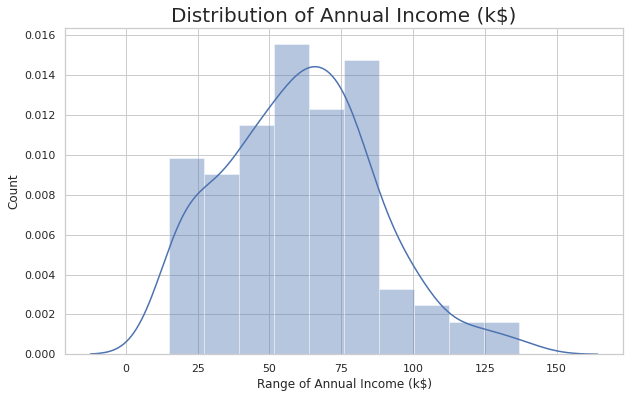

In [ ]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(customer_data['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

Most of the annual income falls between 50K to 85K.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

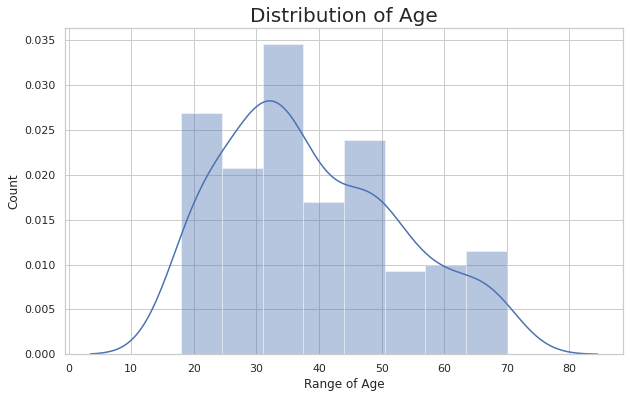

In [ ]:
#Distribution of age
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(customer_data['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

There are customers of a wide variety of ages.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

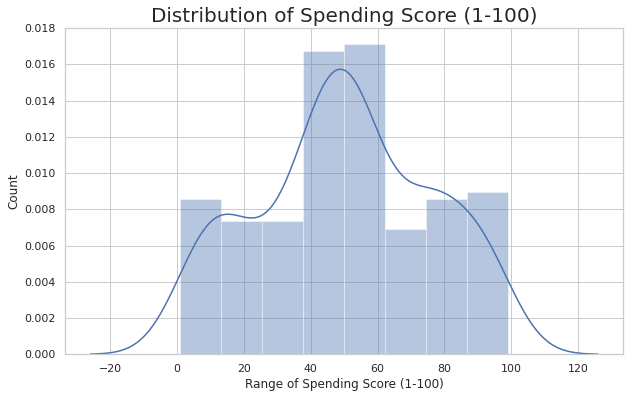

In [ ]:
#Distribution of spending score
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(customer_data['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

The maximum spending score is in the range of 40 to 60.

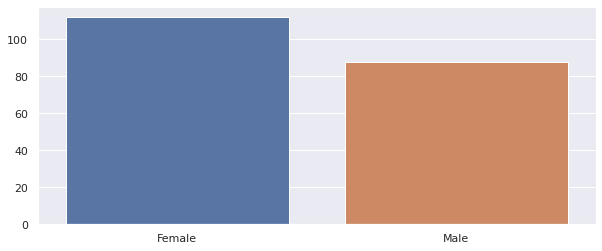

In [ ]:
genders = customer_data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

More female customers than male.

Choosing the Annual Income Column and Spending Score column

In [ ]:
X = customer_data.iloc[:, [3, 4]].values

In [ ]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Choosig the number of clusters

WCSS -> Within Clusters Sum of Squares

Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k. Next, we choose the k for which WSS first starts to diminish. This value of K gives us the best number of clusters to make from the raw data.

WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids. The idea is to minimise the sum.

In [ ]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_) #inertia gives wcss value for each cluster

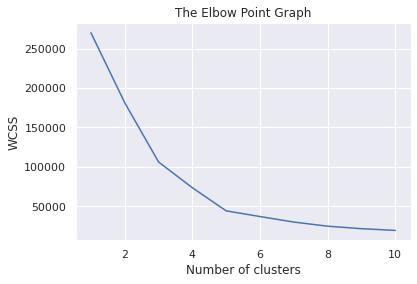

In [ ]:
# plot an elbow graph

sns.set()
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

Optimum Number of Clusters is 5

Training the k-Means Clustering Model

In [ ]:
kmeans = KMeans(n_clusters= 5, init = 'k-means++', random_state=0)

#return a label for each data point based on thier cluster

Y = kmeans.fit_predict(X)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


Visualizing all the clusters

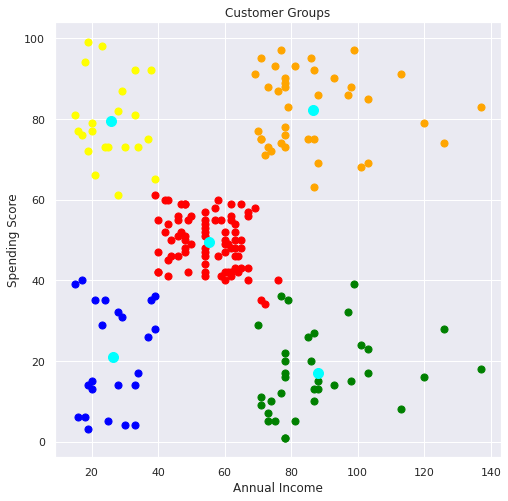

In [ ]:
# plotting all the clusters and their centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0, 0], X[Y==0, 1], s =50, c = 'yellow', label="Cluster 1")
plt.scatter(X[Y==1, 0], X[Y==1, 1], s =50, c = 'red', label="Cluster 2")
plt.scatter(X[Y==2, 0], X[Y==2, 1], s =50, c = 'red', label="Cluster 3")
plt.scatter(X[Y==3, 0], X[Y==3, 1], s =50, c = 'yellow', label="Cluster 4")
plt.scatter(X[Y==4, 0], X[Y==4, 1], s =50, c = 'blue', label="Cluster 5")

# plot the centroids

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c ='cyan', label ='Centroids')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

Cluster   0   which   is   at   centre,average   annual   income   withaverage spending score.

Cluster 1 which is at top right,highest   annual   income   withhighest spending score.

Cluster 2  which   is  at top  left,lowest   annual   income   withhighest spending score.

Cluster   3  which   is   at   bottomright, high annual income withlow spending score.

Cluster   4  which   is   at   bottomleft, lowest annual income withlowest spending score

**Conclusion :**
So we concluded that the ,

The   Highest   income   ,   highspending    can   be  target  these type of customers as they earn more   money   and   spend   as much as they want.

Highest income, low spending can   be   target   these   type   of customers  by  asking   feedback and advertising the product in a better way.

Average   income,   Average spending   may   or  may  not   be beneficial   to   the   mall   owners of this type of customers.

Low   income,   High   spending can   be   target   these   type   of
customers   by   providing  them with low-cost EMI’s etc.

Low   income,   Low   spending don’t   target   these   type   of customers because  they earn a bit  and spend some  amount of money.So high income, high spending are the most   beneficial   ones   to   the   mall owners   which   increases   the   owner’sbusiness. (Cluster 1)